In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a style for our plots
sns.set_style("darkgrid")

In [3]:
# Load the dataset
# Make sure the CSV file is in the same folder as your notebook, or provide the full path.
# Added engine='python' to handle potential parsing errors with quotes
df = pd.read_csv("/content/Netflix Dataset.csv", engine='python')

# See the first 5 rows to understand the data
print(df.head())

# Get a summary of the dataset (columns, data types, null values)
print(df.info())

  Show_Id Category  Title           Director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie  07:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                Cast        Country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

        Release_Date Rating   Duration  \
0    August 14, 2020  TV-MA  4 Seasons   
1  December 23, 2016  TV-MA     93 min   
2  December 20, 2018      R     78 min   
3  November 16, 2017  PG-13     80 min   
4    January 1, 2020  PG-13    123 min   

                               

In [5]:
# Drop rows with missing values in key columns
df.dropna(subset=['Director', 'Cast', 'Country', 'Release_Date', 'Rating'], inplace=True)

# Convert the 'Release_Date' column to a proper date format
df['Release_Date'] = pd.to_datetime(df['Release_Date'], format='%B %d, %Y', errors='coerce')

# Create a new column just for the year
df['year_added'] = df['Release_Date'].dt.year

# Check the cleaning results
print(df.isnull().sum())

Show_Id         0
Category        0
Title           0
Director        0
Cast            0
Country         0
Release_Date    4
Rating          0
Duration        0
Type            0
Description     0
year_added      4
dtype: int64


Category
Movie      4675
TV Show     136
Name: count, dtype: int64


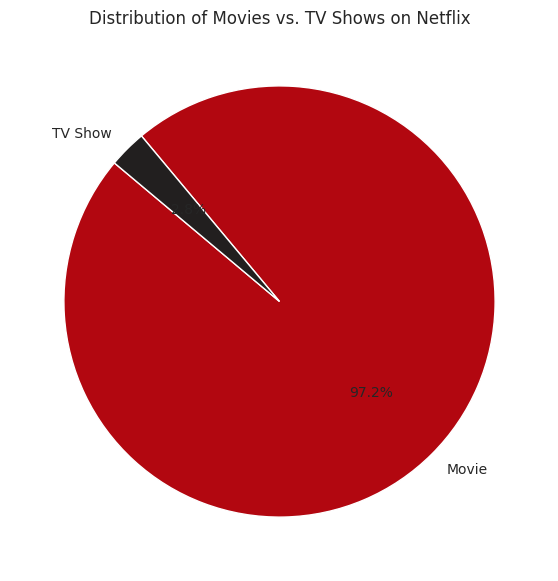

In [6]:
# Count the number of Movies vs. TV Shows
category_counts = df['Category'].value_counts()
print(category_counts)

# Create a pie chart to visualize the distribution
plt.figure(figsize=(7, 7))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=['#b20710', '#221f1f'])
plt.title('Distribution of Movies vs. TV Shows on Netflix')
plt.show()

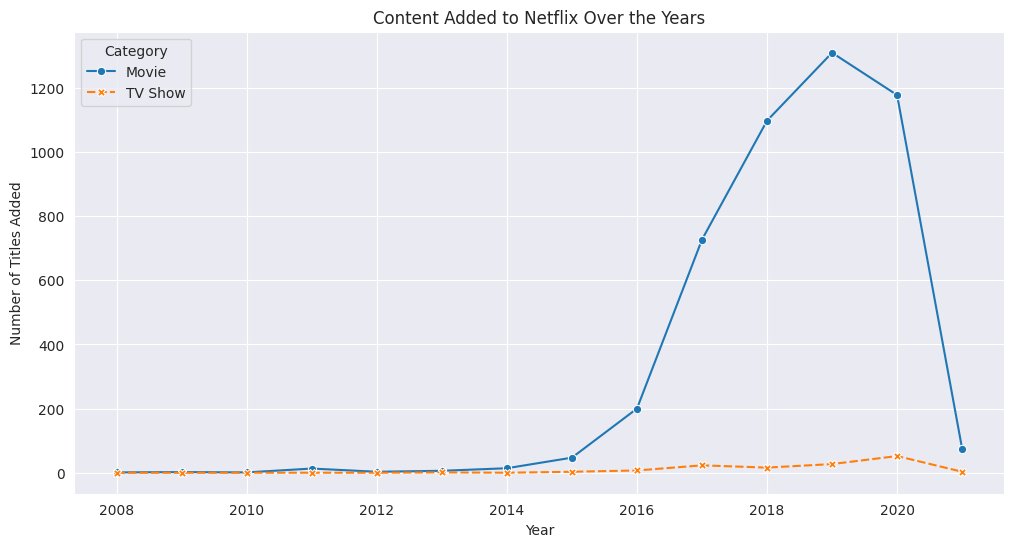

In [7]:
# Group by year and category to see the trend
content_over_time = df.groupby('year_added')['Category'].value_counts().unstack().fillna(0)

# Create a line chart to visualize the trend
plt.figure(figsize=(12, 6))
sns.lineplot(data=content_over_time, markers=True)
plt.title('Content Added to Netflix Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles Added')
plt.legend(title='Category')
plt.show()

/tmp/ipython-input-168210034.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='mako')


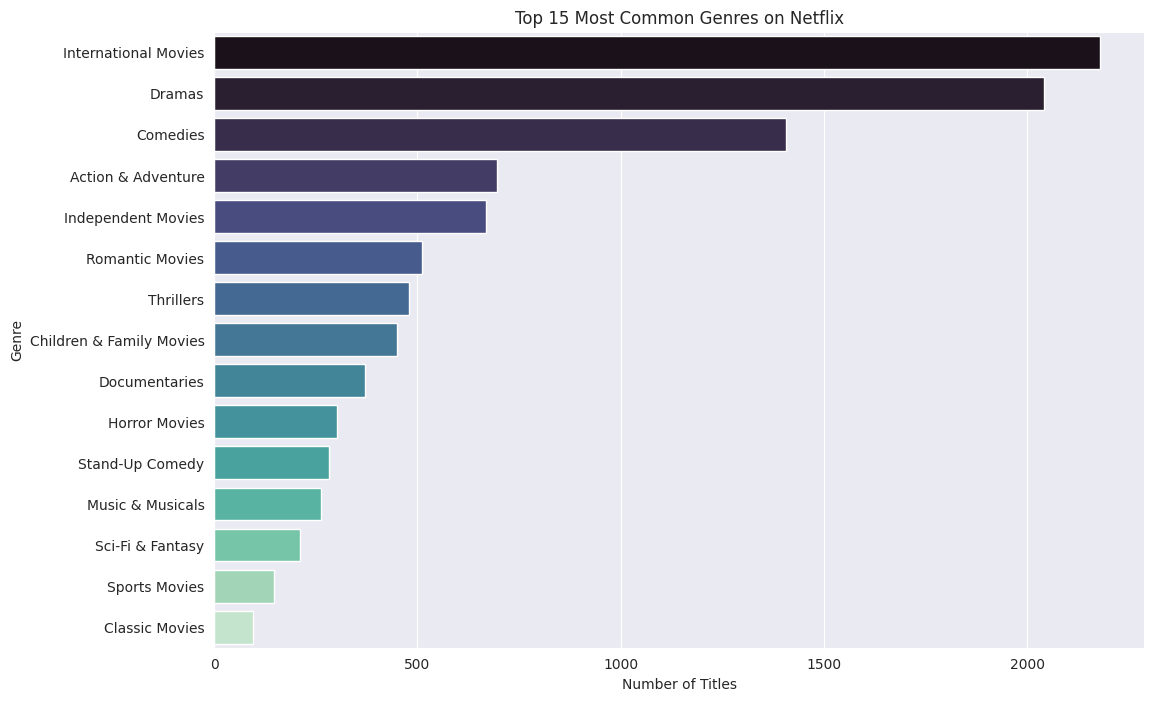

In [8]:
# Split the 'Type' column to count individual genres
# We'll count the top 15 genres
top_genres = df['Type'].str.split(', ').explode().value_counts().nlargest(15)

# Create a bar chart for the top genres
plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='mako')
plt.title('Top 15 Most Common Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

/tmp/ipython-input-1681893650.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')


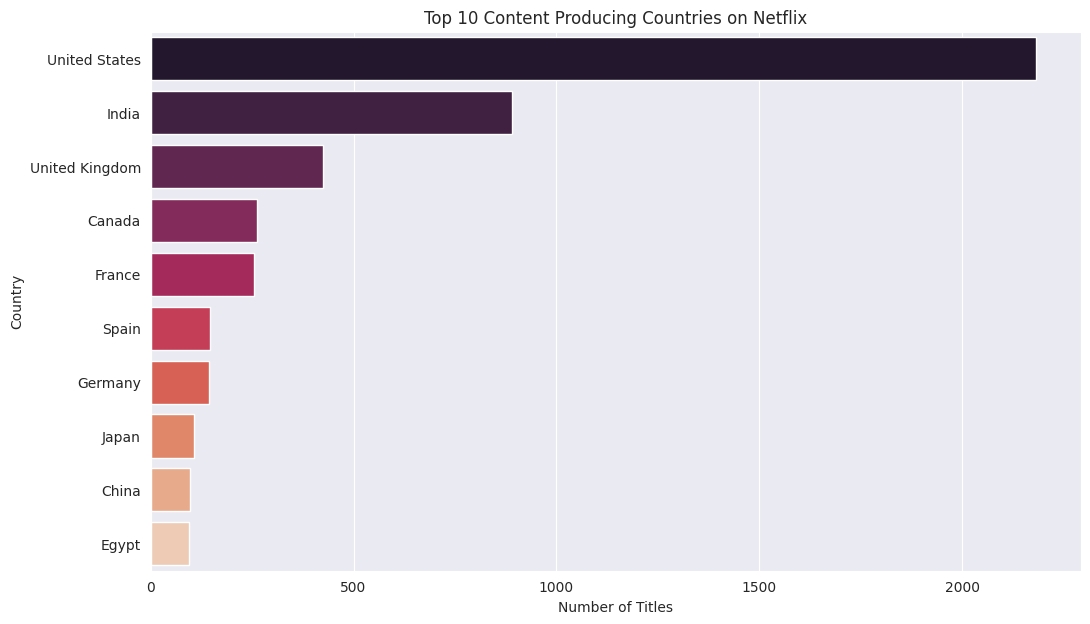

In [9]:
# Count the number of titles from the top 10 countries
top_countries = df['Country'].str.split(', ').explode().value_counts().nlargest(10)

# Create a bar chart for the top countries
plt.figure(figsize=(12, 7))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='rocket')
plt.title('Top 10 Content Producing Countries on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

In [10]:
# See the different ratings available
print(df['Rating'].unique())

# Count the occurrences of each rating
rating_counts = df['Rating'].value_counts()
print(rating_counts)

['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-G' 'TV-PG' 'NR' 'PG' 'G' 'TV-Y7' 'TV-Y'
 'NC-17' 'TV-Y7-FV' 'UR']
Rating
TV-MA       1668
TV-14       1133
R            654
TV-PG        413
PG-13        375
PG           238
TV-G          80
TV-Y          71
TV-Y7         69
NR            62
G             38
UR             5
TV-Y7-FV       3
NC-17          2
Name: count, dtype: int64


/tmp/ipython-input-1068334794.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='viridis')


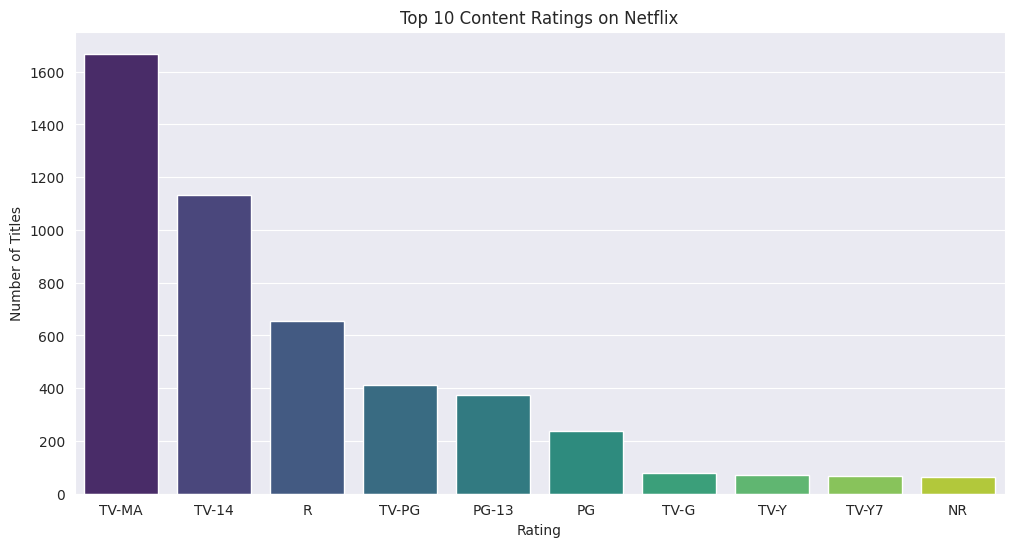

In [11]:
# Get the top 10 ratings
top_ratings = df['Rating'].value_counts().nlargest(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_ratings.index, y=top_ratings.values, palette='viridis')
plt.title('Top 10 Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.show()